# loading libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# loading dataset


In [2]:
data=pd.read_csv("dataset1.xls")

In [3]:
data

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


# understanding the data


In [4]:
data.shape

(11055, 32)

In [5]:
data.columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
data.info

<bound method DataFrame.info of           id  having_IP_Address  URL_Length  Shortining_Service  \
0          1                 -1           1                   1   
1          2                  1           1                   1   
2          3                  1           0                   1   
3          4                  1           0                   1   
4          5                  1           0                  -1   
...      ...                ...         ...                 ...   
11050  11051                  1          -1                   1   
11051  11052                 -1           1                   1   
11052  11053                  1          -1                   1   
11053  11054                 -1          -1                   1   
11054  11055                 -1          -1                   1   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                     1                        -1             -1   
1                     1    

In [7]:
data.isnull() 

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Visualization

# pre processing

In [8]:
le=preprocessing.LabelEncoder()
label=le.fit_transform(data["Result"])
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
data['Result']=label
data

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,0
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,0


In [10]:
data.corr()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
id,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


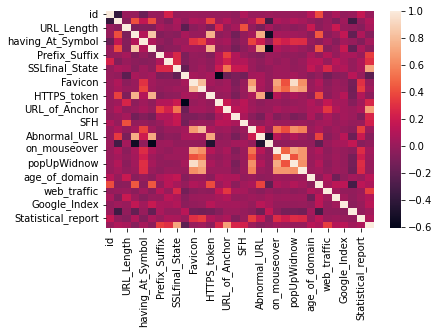

In [11]:
heat=sns.heatmap(data.corr())

In [12]:
x=data.iloc[:,1:31].values
y=data.iloc[:,31].values

In [13]:
print(x.shape)
print(y.shape)

(11055, 30)
(11055,)


# training and testing


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7738, 30)
(3317, 30)
(7738,)
(3317,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [17]:
ML_model=[]
Accuracy=[]
Recall=[]
Precision=[]
f1_Score=[]
times=[]
def storeres(model,a,b,c,d,t):
    ML_model.append(model)
    Accuracy.append(a)
    Recall.append(b)
    Precision.append(c)
    f1_Score.append(d)
    times.append(t)

In [18]:
start_time = time.time() 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)
y_predict1=dtree.predict(x_test)
dtc_acc=accuracy_score(y_test,y_predict1)
dtc_recall=recall_score(y_test, y_predict1)
dtc_precision=precision_score(y_test,y_predict1)
dtc_f1_score=f1_score(y_test,y_predict1)
end_time = time.time()
decisiontree_time = end_time  - start_time

In [19]:
storeres('Decision Tree',dtc_acc,dtc_recall,dtc_precision,dtc_f1_score,decisiontree_time)
print('Decision Tree:',dtc_acc,dtc_recall,dtc_precision,dtc_f1_score)
print('Execution time for the decision tree:', decisiontree_time,'seconds')

Decision Tree: 0.9562858004220681 0.9655902593965061 0.957983193277311 0.9617716846823096
Execution time for the decision tree: 0.33135437965393066 seconds


In [20]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
rfc_acc=accuracy_score(y_test,y_pred2)
rfc_recall=recall_score(y_test, y_pred2)
rfc_precision=precision_score(y_test,y_pred2)
rfc_f1_score=f1_score(y_test, y_pred2)
end_time = time.time()
randomforest_time = end_time - start_time


In [21]:
storeres('Random Forest',rfc_acc,rfc_recall,rfc_precision,rfc_f1_score,randomforest_time)
print('Execution time:', randomforest_time,'seconds')

Execution time: 0.18948674201965332 seconds


In [22]:
start_time = time.time()
from sklearn.naive_bayes import BernoulliNB
b_bayes=BernoulliNB()
b_bayes.fit(x_train,y_train)
y_pred3=b_bayes.predict(x_test)
NBC_acc=accuracy_score(y_test,y_pred3)
NBC_recall=recall_score(y_test, y_pred3)
NBC_precision=precision_score(y_test,y_pred3)
NBC_f1_score=f1_score(y_test, y_pred3)
end_time = time.time()
navibayes_time = end_time - start_time

In [23]:
storeres("Bernoulli-naive_bayes",NBC_acc,NBC_recall,NBC_precision,NBC_f1_score,navibayes_time)
print('Execution time:', navibayes_time,'seconds')

Execution time: 0.05034017562866211 seconds


In [24]:
start_time = time.time()
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred4= classifier.predict(x_test)
logi_acc=accuracy_score(y_test, y_pred4)
logi_recall=recall_score(y_test, y_pred4)
logi_precision=precision_score(y_test,y_pred4)
logi_f1_score=f1_score(y_test, y_pred4)
end_time = time.time()
logistic_time = end_time - start_time# In[ ]:



In [25]:
storeres("LogisticRegression",logi_acc,logi_recall,logi_precision,logi_f1_score,logistic_time)
print('Execution time:', logistic_time ,'seconds')

Execution time: 0.1179358959197998 seconds


In [26]:
start_time = time.time()
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(x_train,y_train)
y_pred5=svm.predict(x_test)
svm_acc=accuracy_score(y_test,y_pred5)
svm_recall=recall_score(y_test, y_pred5)
svm_precision=precision_score(y_test,y_pred5)
svm_f1_score=f1_score(y_test, y_pred5)
end_time = time.time()
svm_time = end_time - start_time



In [27]:
storeres("Support_Vector_Mechine",svm_acc,svm_recall,svm_precision,svm_f1_score,svm_time )
print('Execution time:',svm_time,'seconds')

Execution time: 2.8704302310943604 seconds


In [28]:
'''start_time = time.time()


error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
end_time = time.time()
print(end_time-start_time)'''

'start_time = time.time()\n\n\nerror1= []\nerror2= []\nfor k in range(1,15):\n    knn= KNeighborsClassifier(n_neighbors=k)\n    knn.fit(x_train,y_train)\n    y_pred1= knn.predict(x_train)\n    error1.append(np.mean(y_train!= y_pred1))\n    y_pred2= knn.predict(x_test)\n    error2.append(np.mean(y_test!= y_pred2))\n# plt.figure(figsize(10,5))\nplt.plot(range(1,15),error1,label="train")\nplt.plot(range(1,15),error2,label="test")\nplt.xlabel(\'k Value\')\nplt.ylabel(\'Error\')\nplt.legend()\nend_time = time.time()\nprint(end_time-start_time)'

In [29]:
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
#from sklearn import metrics
y_pred6=neigh.predict(x_test)
knn_acc=accuracy_score(y_test,y_pred6)
knn_recall=recall_score(y_test, y_pred6)
knn_precision=precision_score(y_test,y_pred6)
knn_f1_score=f1_score(y_test, y_pred6)
end_time = time.time()
knn_time = end_time - start_time


C:\Users\priya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
storeres("KNeighborsClassifier",knn_acc,knn_recall,knn_precision,knn_f1_score,knn_time)
print('Execution time:',knn_time ,'seconds')

Execution time: 1.0221176147460938 seconds


In [31]:
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
y_pred7=gbt.predict(x_test)
gbt_acc=accuracy_score(y_test,y_pred7)
gbt_recall=recall_score(y_test, y_pred7)
gbt_precision=precision_score(y_test,y_pred7)
gbt_f1_score=f1_score(y_test, y_pred7)
end_time = time.time()
gb_time = end_time - start_time

In [32]:
storeres("GradientBoosting",gbt_acc,gbt_recall,gbt_precision,gbt_f1_score,gb_time)
print('Execution time:', gb_time ,'seconds')

Execution time: 2.0495309829711914 seconds


In [33]:
start_time = time.time()
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier() 
hgb.fit(x_train,y_train)
y_pred8=hgb.predict(x_test)
hgb_acc=accuracy_score(y_test,y_pred8)
hgb_recall=recall_score(y_test, y_pred8)
hgb_precision=precision_score(y_test,y_pred8)
hgb_f1_score=f1_score(y_test, y_pred8)
end_time = time.time()
histgram_time = end_time -start_time


In [34]:
storeres("HistGradientBoosting",hgb_acc,hgb_recall,hgb_precision,hgb_f1_score,histgram_time)
print('Execution time:', histgram_time,'seconds')

Execution time: 3.351503610610962 seconds


In [35]:
start_time = time.time()
from lightgbm import LGBMClassifier
lgb = LGBMClassifier() 
lgb.fit(x_train,y_train)
y_pred9=lgb.predict(x_test)
lgb_acc=accuracy_score(y_test,y_pred9)
lgb_recall=recall_score(y_test, y_pred9)
lgb_precision=precision_score(y_test,y_pred9)
lgb_f1_score=f1_score(y_test, y_pred9)
end_time = time.time()
lgbm_time = end_time - start_time


In [36]:
storeres("LightGradientBoosting",lgb_acc,lgb_recall,lgb_precision,lgb_f1_score,lgbm_time)
print('Execution time:', lgbm_time ,'seconds')

Execution time: 3.162266254425049 seconds


In [37]:
start_time = time.time()
from sklearn.ensemble import AdaBoostClassifier
Adamodel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model=Adamodel.fit(x_train,y_train)
y_pred10=model.predict(x_test)
adaboost_acc=accuracy_score(y_test,y_pred10)
adaboost_recall=recall_score(y_test, y_pred10)
adaboost_precision=precision_score(y_test,y_pred10)
adaboost_f1_score=f1_score(y_test, y_pred10)
end_time = time.time()
adaboost_time = end_time - start_time



In [38]:
storeres("AdaBoost",adaboost_acc,adaboost_recall,adaboost_precision,adaboost_f1_score,adaboost_time)
print('Execution time:', adaboost_time,'seconds')

Execution time: 1.6376280784606934 seconds


In [39]:
start_time = time.time()
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(x_train,y_train)
y_pred11=xgb.predict(x_test)
xgboost_acc=accuracy_score(y_test,y_pred11)
xgboost_recall=recall_score(y_test, y_pred11)
xgboost_precision=precision_score(y_test,y_pred11)
xgboost_f1_score=f1_score(y_test, y_pred11)
end_time = time.time()
xgboost_time = end_time - start_time

In [40]:
storeres("XGBoost",xgboost_acc,xgboost_recall,xgboost_precision,xgboost_f1_score,xgboost_time)
print('Execution time:', xgboost_time,'seconds')

Execution time: 2.1758921146392822 seconds


In [41]:
result=pd.DataFrame({'ML_model':ML_model,'ACCURACY':Accuracy,'recall':Recall,'precision':Precision,'F1_score':f1_Score,'Time_excute/sec':times})

In [42]:
result

,ML_model,ACCURACY,recall,precision,F1_score,Time_excute/sec
0,Decision Tree,0.956286,0.965590,0.957983,0.961772,0.331354
1,Random Forest,0.963220,0.975648,0.960396,0.967962,0.189487
2,Bernoulli-naive_bayes,0.924631,0.944415,0.924832,0.934521,0.050340
3,LogisticRegression,0.917395,0.922181,0.932049,0.927089,0.117936
4,Support_Vector_Mechine,0.921616,0.934357,0.928459,0.931398,2.870430
5,KNeighborsClassifier,0.944528,0.956061,0.947037,0.951528,1.022118
6,GradientBoosting,0.947844,0.956591,0.952055,0.954317,2.049531
7,HistGradientBoosting,0.966536,0.976178,0.965445,0.970782,3.351504
8,LightGradientBoosting,0.965933,0.975648,0.964921,0.970255,3.162266
9,AdaBoost,0.937896,0.949179,0.942197,0.945675,1.637628


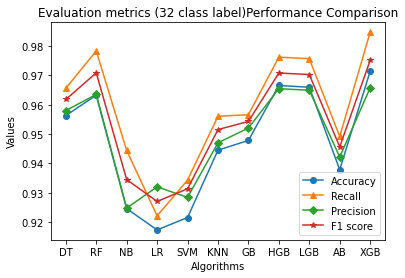

In [3]:
import matplotlib.pyplot as plt

# Data for algorithms
x_values = ["DT","RF","NB","LR","SVM","KNN","GB","HGB","LGB","AB","XGB"]
accuracy=[0.956286,
0.963220,
0.924631,
0.917395,
0.921616,
0.944528,
0.947844,
0.966536,
0.965933,
0.937896,
0.971360

]
recall= [0.965590,
0.978295,
0.944415,
0.922181,
0.934357,
0.956061,
0.956591,
0.976178,
0.975648,
0.949179,
0.984648
]
precision= [0.957983,
0.963504,
0.924832,
0.932049,
0.928459,
0.947037,
0.952055,
0.965445,
0.964921,
0.942197,
0.965732,
]
f1_score=[0.961772,
0.970843,
0.934521,
0.927089,
0.931398,
0.951528,
0.954317,
0.970782,
0.970255,
0.945675,
0.975098
]
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data as lines
ax.plot(x_values, accuracy, label='Accuracy',marker="o")
ax.plot(x_values, recall, label='Recall',marker="^")
ax.plot(x_values, precision, label='Precision',marker="D")
ax.plot(x_values, f1_score, label='F1 score',marker="*")

# Add labels and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Values')
ax.set_title('Evaluation metrics (32 class label)Performance Comparison')
ax.legend()

# Display the plot
plt.show()

([<matplotlib.axis.XTick at 0x1b0571484f0>,
 [Text(0, 0, ''), Text(0, 0, '')])

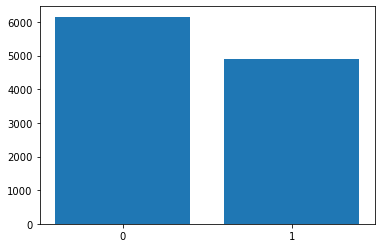

In [44]:
plt.bar(data['Result'].unique(), data['Result'].value_counts())
plt.xticks([1,0])

In [45]:
data['Result'].unique()

array([0, 1], dtype=int64)

In [46]:
data['Result'].count()

11055

In [47]:
print(Accuracy)

[0.9562858004220681, 0.9632197769068436, 0.924630690382876, 0.9173952366596322, 0.9216159179981911, 0.9445281881217968, 0.9478444377449503, 0.966536026529997, 0.96593307205306, 0.9378956888754899, 0.9713596623454929]


In [48]:
format=['%.2f' % ele for ele in Accuracy]

In [49]:
format

['0.96',
 '0.96',
 '0.92',
 '0.92',
 '0.92',
 '0.94',
 '0.95',
 '0.97',
 '0.97',
 '0.94',
 '0.97']